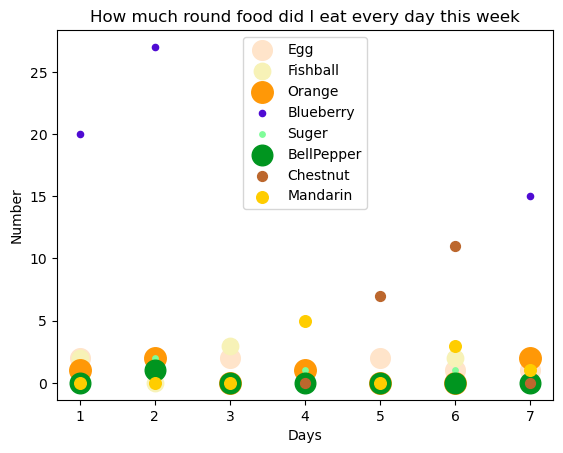

In [64]:
#How much round food did I eat every day this week
import numpy as np
import matplotlib.pyplot as plt

days = [1, 2, 3, 4, 5, 6, 7]
Y1 = [2, 2, 2, 1, 2, 1, 1]
Y2=[2, 0, 3, 0, 0, 2, 0]
Y3=[1, 2, 0, 1, 0, 0, 2]
Y4=[20, 27, 0, 0, 0, 0, 15]
Y5=[0,2,0,1,0,1,1]
Y6=[0,1,0,0,0,0,0]
Y7=[0,0,0,0,7,11,0]
Y8=[0,0,0,5,0,3,1]
plt.scatter(days,Y1, label='Egg',color='#FFE4CA',s=200)
plt.scatter(days,Y2,label='Fishball',color='#F7F2B7', s=140)
plt.scatter(days,Y3,label='Orange',color='#FF9807', s=240)
plt.scatter(days,Y4,label='Blueberry',color='#4F0BD3', s=20)
plt.scatter(days,Y5,label='Suger',color='#7FFD99', s= 15)
plt.scatter(days,Y6,label='BellPepper',color='#00951F', s=220)
plt.scatter(days,Y7,label='Chestnut',color='#BC672D', s=50)
plt.scatter(days,Y8,label='Mandarin',color='#FFCD00', s=70)
plt.xlabel('Days')
plt.ylabel('Number')
plt.title('How much round food did I eat every day this week')
plt.legend()

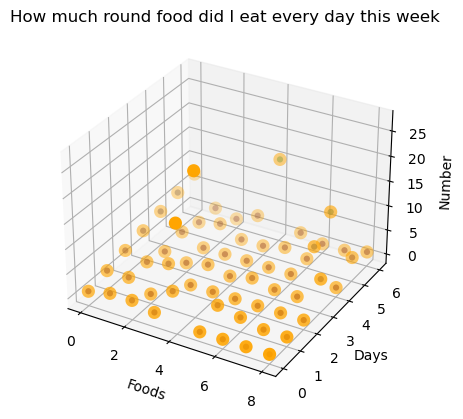

In [72]:
#How much round food did I eat every day this week 3D version
import numpy as np
import matplotlib.pyplot as plt

days = [1, 2, 3, 4, 5, 6, 7]
Y1 = [2, 2, 2, 1, 2, 1, 1]
Y2=[2, 0, 3, 0, 0, 2, 0]
Y3=[1, 2, 0, 1, 0, 0, 2]
Y4=[20, 27, 0, 0, 0, 0, 15]
Y5=[0,2,0,1,0,1,1]
Y6=[0,1,0,0,0,0,0]
Y7=[0,0,0,0,7,11,0]
Y8=[0,0,0,5,0,3,1]

ax = plt.figure().add_subplot(projection='3d')

# Plot scatterplot data on the x, y, and z axes.
data = np.column_stack((days, Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8))
x, y = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
x = x.flatten()
y = y.flatten()
z = data.flatten()

ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=5, edgecolor='Orange')

# Make legend, set axes limits and labels
ax.set_xlabel('Foods')
ax.set_ylabel('Days')
ax.set_zlabel('Number')
plt.title('How much round food did I eat every day this week')
plt.show()


TypeError: __init__() got an unexpected keyword argument 'ncols'

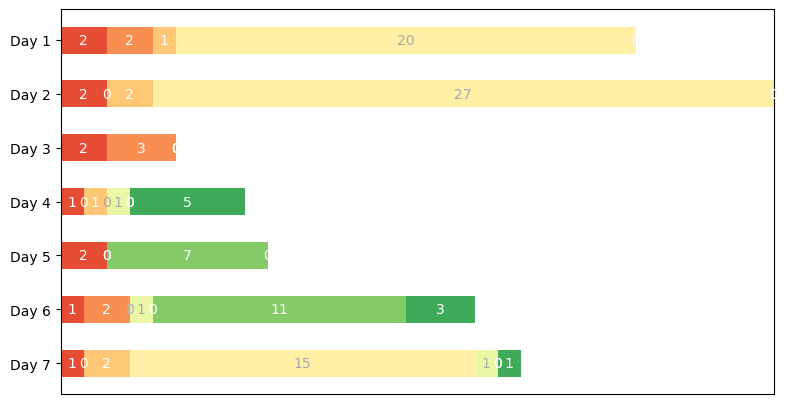

In [100]:
#How much round food did I eat every day this week addinng version
import numpy as np
import matplotlib.pyplot as plt


category_foods = ['Egg','Fishball','Orange','Blueberry','Suger','BellPepper','Chestnut','Mandarin']
days = {
    'Day 1': [2,2,1,20,0,0,0,0],
    'Day 2': [2,0,2,27,0,0,0,0],
    'Day 3': [2,3,0,0,0,0,0,0],
    'Day 4': [1,0,1,0,1,0,0,5],
    'Day 5': [2,0,0,0,0,0,7,0],
    'Day 6': [1,2,0,0,1,0,11,3],
    'Day 7': [1,0,2,15,1,0,0,1]
}


def roundfoodsIeat(days, category_foods):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
    #category_colors = [(255, 228, 202), (247, 242, 183), (255, 152, 7), (79, 11, 211),
                       #(127, 253, 153), (0, 149, 31), (188, 103, 45), (255, 205, 0)]

        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_foods, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_foods), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()


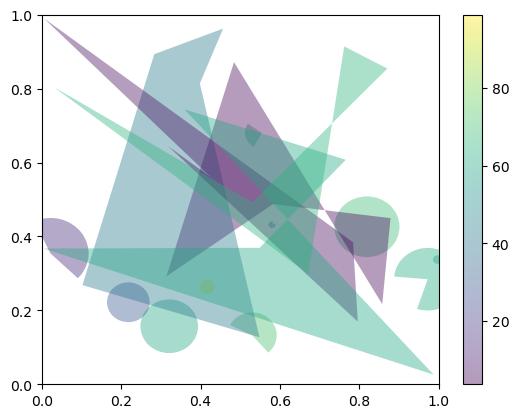

In [106]:
#?
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19980320)


fig, ax = plt.subplots()

resolution = 160  # the number of vertices
N = 5
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
# patches += [
#     Wedge((.3, .7), .1, 0, 360),             # Full circle
#     Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
#     Wedge((.8, .3), .2, 0, 45),              # Full sector
#     Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
# ]

patches += [
    Wedge((2019, 12), .1, 0, 360),             # Full circle a center point of (0.3, 0.7), a radius of 0.1, and a starting angle of 0 and an ending angle of 360.
    Wedge((2021, 3), .2, 0, 360, width=0.05),  # Full ring
    Wedge((2010, 10), .2, 0, 45),              # Full sector
    Wedge((2017, 5), .2, 45, 90, width=0.10),  # Ring sector
]


for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), closed=True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()
